In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import pickle
from scipy import stats
from scipy.special import inv_boxcox 



In [17]:
df = pd.read_csv('/home/user/workshop3_ml_datastreaming/data/processed/cleaned_data.csv')

In [18]:
X = df.drop(columns=['Score'])
y = df['Score']

In [19]:
df.head()

,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent_Africa,Continent_America,Continent_Europe
0,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,0,0,1
1,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,0,0,1
2,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,0,0,1
3,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,0,0,1
4,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,0,1,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
def print_metrics(y_test, y_pred, model_name):
    """
    Print evaluation metrics for the model.
    param y_test: Actual target values
    param y_pred: Predicted target values
    param model_name: Name of the model
    
    """
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"\n📊 {model_name}:")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")


In [22]:
y_train_transformed, lambda_ = stats.boxcox(y_train + 1)
y_test_transformed = stats.boxcox(y_test + 1, lmbda=lambda_)

In [23]:
model = CatBoostRegressor(verbose=0, random_state=42)
model.fit(X_train, y_train_transformed)

In [24]:
y_pred_transformed = model.predict(X_test)
y_pred = inv_boxcox(y_pred_transformed, lambda_) - 1 

In [25]:
print_metrics(y_test, y_pred, "CatBoost con y transformada (Box-Cox)")


📊 CatBoost con y transformada (Box-Cox):
MAE  : 0.3306
MSE  : 0.1812
RMSE : 0.4257
R²   : 0.8549


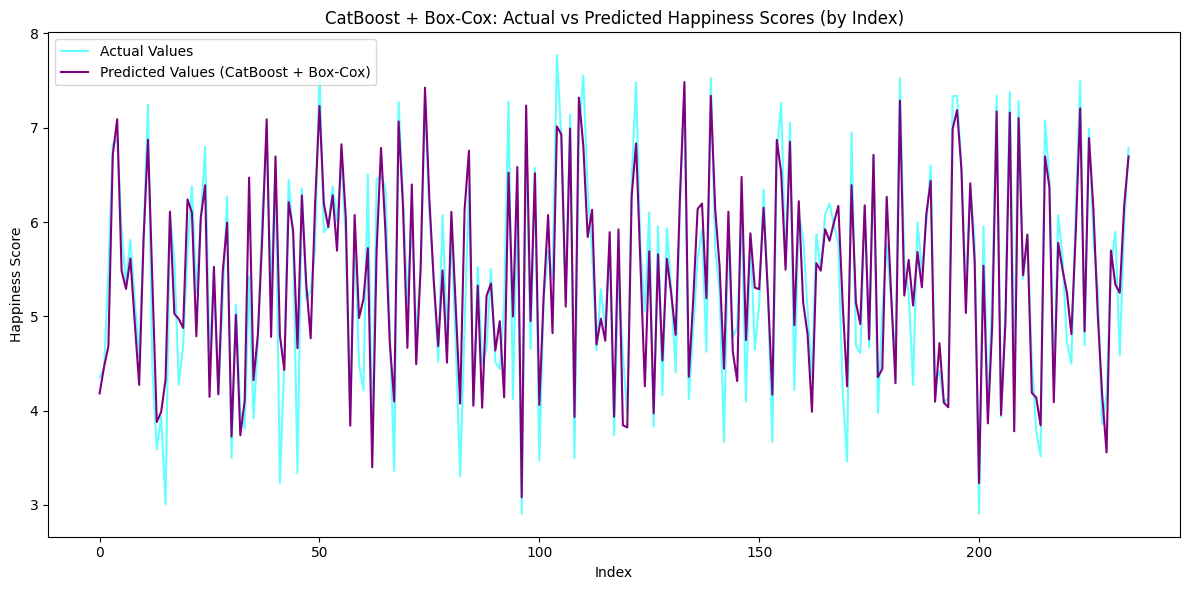

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', color='cyan', linestyle='-', alpha=0.6)
plt.plot(range(len(y_test)), y_pred, label='Predicted Values (CatBoost + Box-Cox)', color='purple', linestyle='-')

plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.title('CatBoost + Box-Cox: Actual vs Predicted Happiness Scores (by Index)')
plt.legend()
plt.tight_layout()
plt.show()


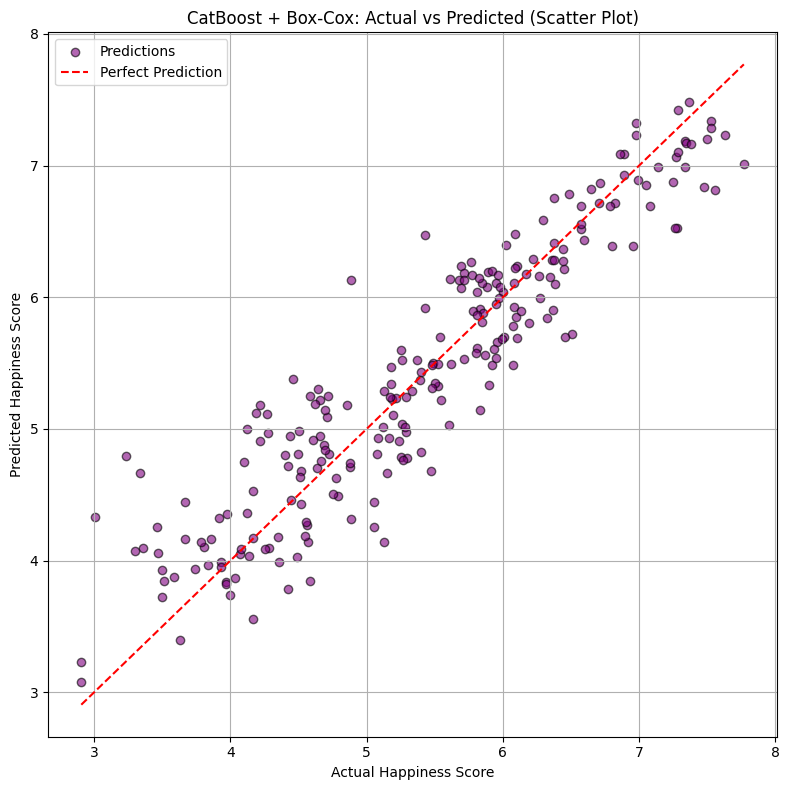

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple', edgecolor='k', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('CatBoost + Box-Cox: Actual vs Predicted (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
save_object = {
    'model': model,
    'lambda_': lambda_
}

with open('/home/user/workshop3_ml_datastreaming/models/catboost_boxcox_bundle.pkl', 'wb') as f:
    pickle.dump(save_object, f)

In [29]:
import joblib

data = joblib.load('/home/user/workshop3_ml_datastreaming/models/catboost_boxcox_bundle.pkl')
print(type(data))
print(data)


<class 'dict'>
{'model': <catboost.core.CatBoostRegressor object at 0x7efce12ee2d0>, 'lambda_': 0.7361002578632944}


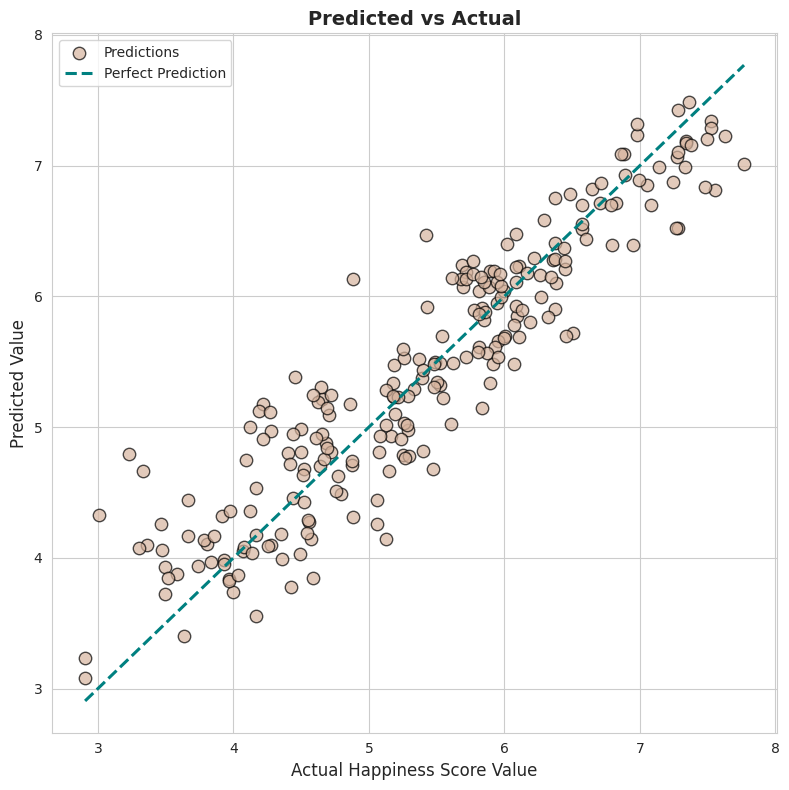

In [35]:
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

# Colores retro/vintage
plt.scatter(y_test, y_pred, alpha=0.7, color='#D7B49E', edgecolor='black', s=80, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'teal', linestyle='--', linewidth=2.2, label='Perfect Prediction')

plt.xlabel('Actual Happiness Score Value', fontsize=12)
plt.ylabel('Predicted Value', fontsize=12)
plt.title('Predicted vs Actual', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

